In [18]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
from feat_desc import *
import cv2
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,formatter=dict(float=lambda x: "%.3g" % x))
from corner_detector import *
from anms import *
from feat_match import *
from ransac_est_homography import *

max_anms=3000

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
img1=cv2.imread('small-left.jpg')
gray = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
X1,Y1,rmax=anms(c, max_anms)
d1 = feat_desc(gray,X1,Y1)
kp1=[]
for (_x,_y) in zip(X1,Y1):
    kp1.append(cv2.KeyPoint(_x,_y,40))


13497


In [20]:
img2=cv2.imread('small-middle.jpg')
gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
c = corner_detector(gray)
print(np.sum(c>0))
X2,Y2,rmax=anms(c, max_anms)
d2 = feat_desc(gray,X2,Y2)
print("Rmax" + str(rmax))
kp2=[]
for (_x,_y) in zip(X2,Y2):
    kp2.append(cv2.KeyPoint(_x,_y,40))


30178
Rmax7.0710678118654755


In [21]:
m,dMatch=feat_match(d1, d2)
x1=[]
y1=[]
x2=[]
y2=[]

for k,idx in enumerate(m):
    if (idx != -1):
        # is 0 x or 1 x?
        x1.append(X1[k])
        y1.append(Y1[k])
        x2.append(X2[idx])
        y2.append(Y2[idx])
x1=np.array(x1)
x2=np.array(x2)
y1=np.array(y1)
y2=np.array(y2)


In [27]:
f=np.vstack((x1,y1))
points1 = f.T
g=np.vstack((x2,y2))
points2 = g.T
H, mask = cv2.findHomography(points1, points2,cv2.RANSAC)
print(H)

[[-0.846 -0.967 1.12e+03]
 [-0.272 -1.85 954]
 [-0.00044 -0.00216 1]]


MaxInlierCount6
Final H[[-0.515 -0.279 731]
 [-0.321 -0.187 462]
 [-0.000702 -0.000387 1]]
[[-0.515 -0.279 731]
 [-0.321 -0.187 462]
 [-0.000702 -0.000387 1]]


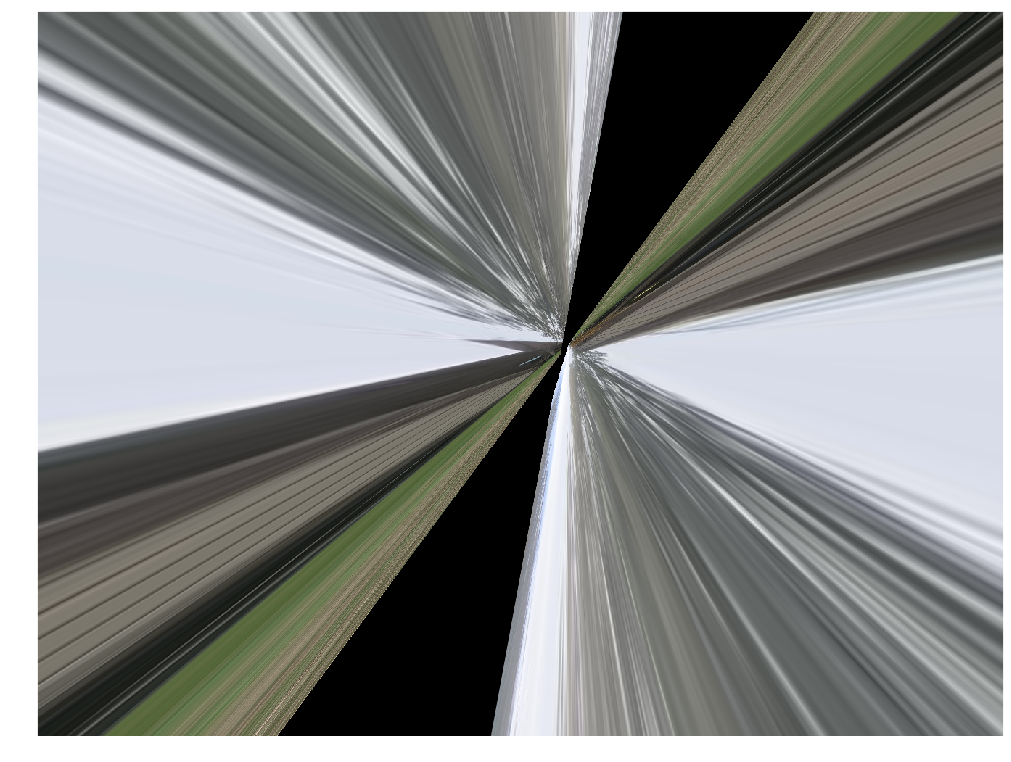

In [31]:

H, inlier_ind=ransac_est_homography(x1,y1,x2,y2,5)

result = cv2.warpPerspective(img1, H,(int(img1.shape[1]), int(img1.shape[0])))#,flags=cv2.INTER_LINEAR)
fig=plt.figure(figsize=(16, 12), dpi= 80, facecolor='w', edgecolor='k')
print(H)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

12


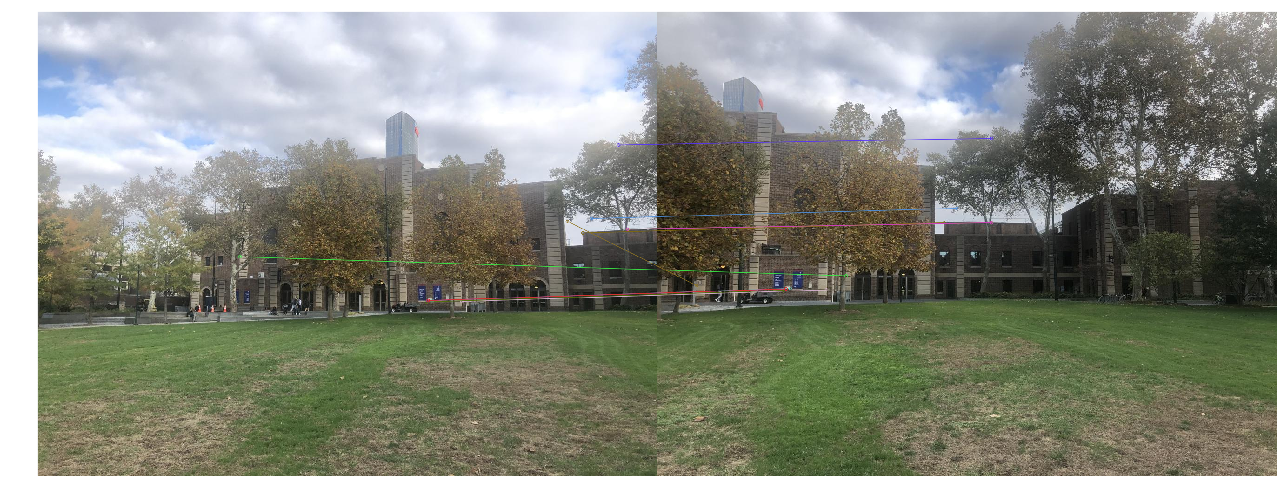

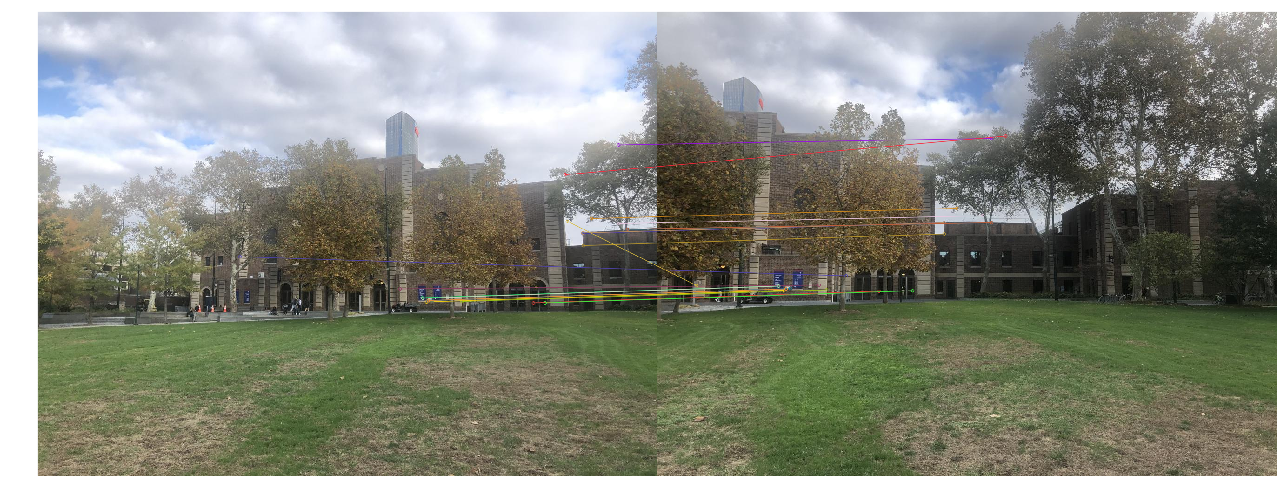

In [26]:
mask = np.array(inlier_ind, dtype=bool)

mfilter = []
for idx,i in enumerate(mask):
    if i == True:
        mfilter.append(dMatch[idx])
img_matches = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
print(len(mfilter))
f=cv2.drawMatches(img1, kp1, img2, kp2, mfilter, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()
f=cv2.drawMatches(img1, kp1, img2, kp2, dMatch, img_matches, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
fig=plt.figure(figsize=(20, 18), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.show()